<a href="https://colab.research.google.com/github/eduardarsimoes/BD1_PedidON/blob/master/atividades/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC**

### Instalando bibliotecas de acesso

In [ ]:
#!pip install --user psycopg2-binary
#!pip install --user pandas
#!pip install --user seaborn
#!pip install -U scikit-learn

### Importando bibliotecas e verificando versões

In [ ]:
import sklearn as skl
import scipy as sc
import pandas as pd
import matplotlib as plt #; plt.rcdefaults()
import numpy as np
import sys
import seaborn as sns
#import psycopg2
from datetime import date
#import random

print('Sklearn: {}'.format(skl.__version__))
print('Scipy: {}'.format(sc.__version__))
print('Pandas: {}'.format(pd.__version__))
print('MatPlotLib: {}'.format(plt.__version__))
print('Numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

Sklearn: 0.22.2.post1
Scipy: 1.4.1
Pandas: 1.1.5
MatPlotLib: 3.2.2
Numpy: 1.19.5
Python: 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


### Módulos específicos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from matplotlib import pyplot

### Carregando dataset e resumo de dados

In [ ]:
url = "https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/titanic_lab_sample.csv"
dataset = pd.read_csv(url, header=0)
print(("Shape: {}\n").format(dataset.shape))
print(dataset.head())
print(("\nDescribe:\n{}\n").format(dataset.describe()))
print(dataset.groupby('survived').size())

Shape: (1108, 7)

   pclass  sex      age  sibsp  parch      fare  survived
0       1    1  29.0000      0      0  211.3375         1
1       1    0   0.9167      1      2  151.5500         1
2       1    1   2.0000      1      2  151.5500         0
3       1    0  30.0000      1      2  151.5500         0
4       1    1  25.0000      1      2  151.5500         0

Describe:
            pclass          sex  ...           fare     survived
count  1108.000000  1108.000000  ...    1108.000000  1108.000000
mean      2.215704     0.387184  ...    5135.653576     0.420578
std       0.858270     0.487326  ...   27541.433817     0.493875
min       1.000000     0.000000  ...       0.000000     0.000000
25%       1.000000     0.000000  ...       9.840650     0.000000
50%       2.000000     0.000000  ...      26.000000     0.000000
75%       3.000000     1.000000  ...      71.837475     1.000000
max       3.000000     1.000000  ...  262375.000000     1.000000

[8 rows x 7 columns]

survived
0    6

### Análise gráfica

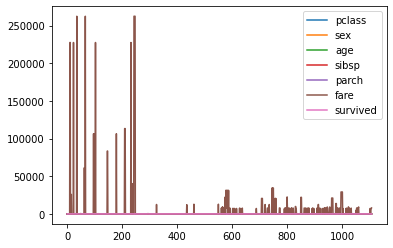

In [ ]:
dataset.plot()

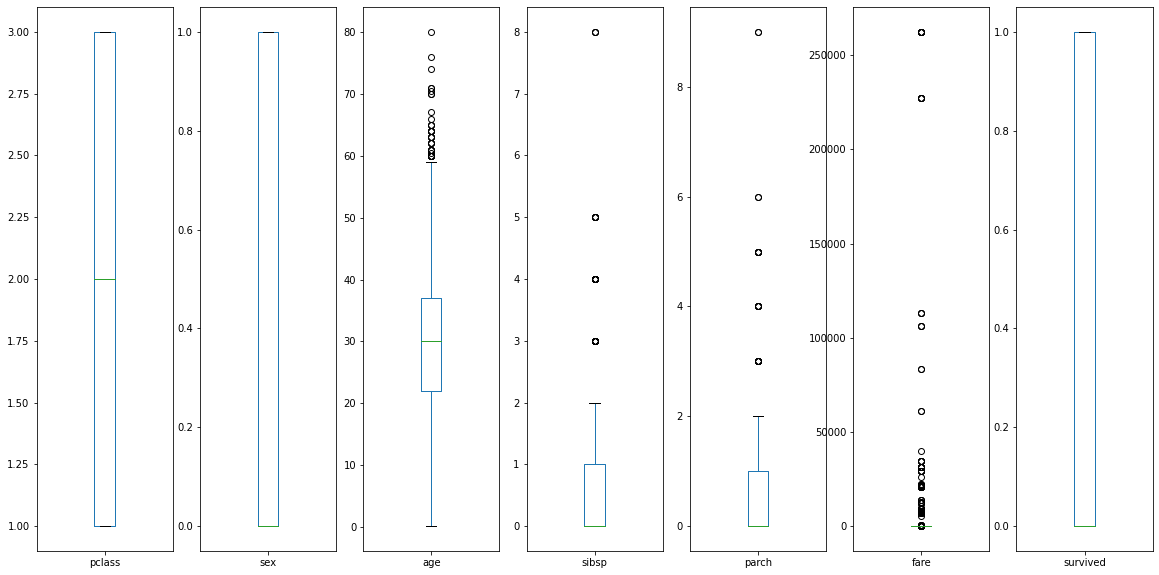

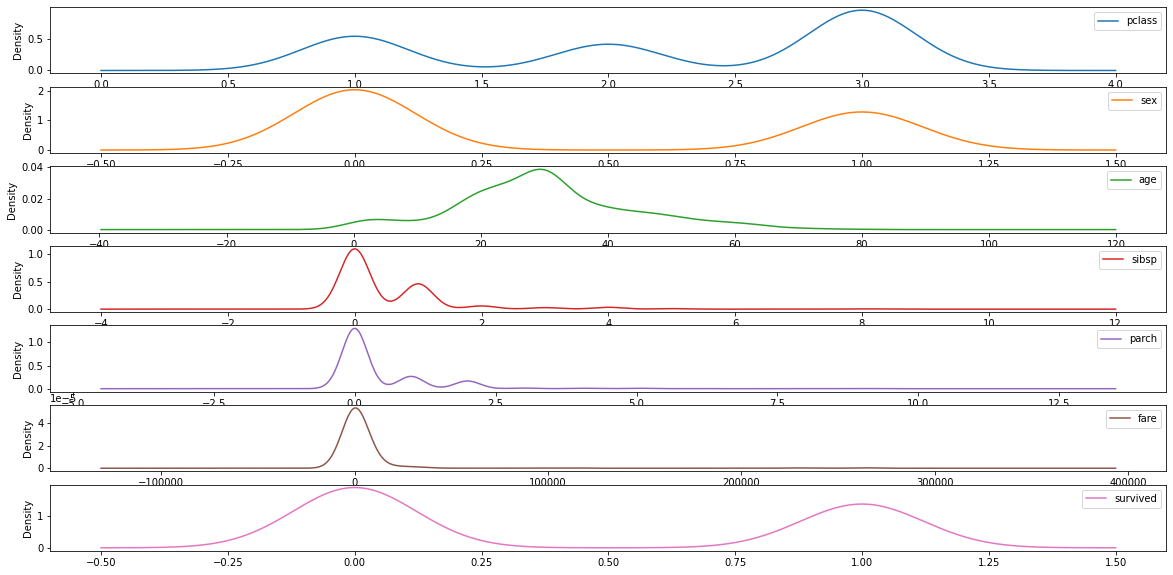

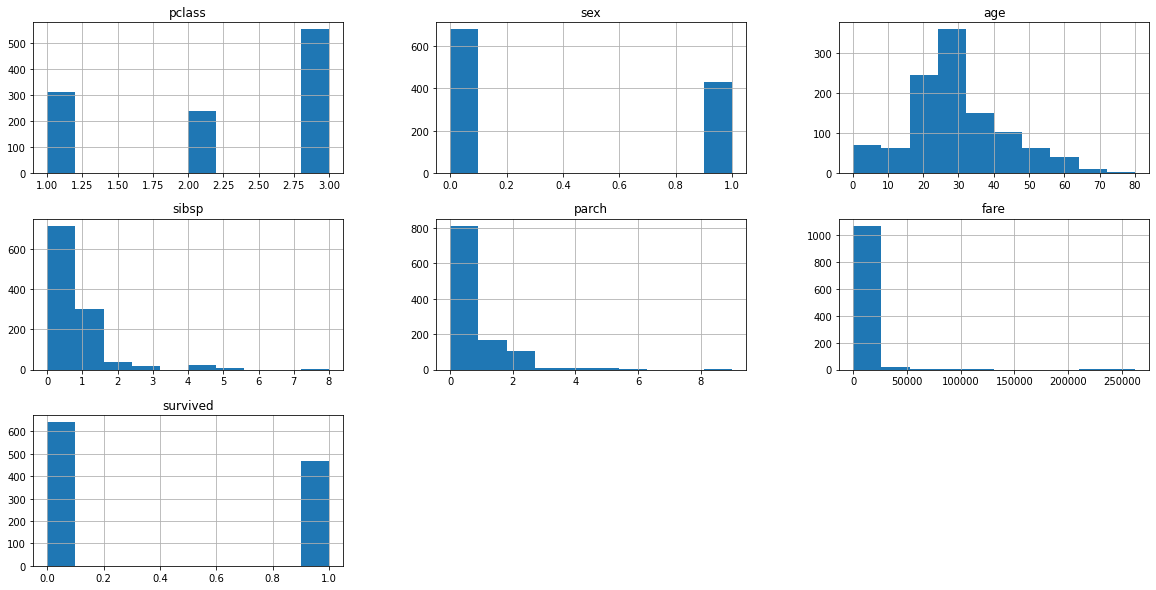

In [ ]:
#box e plots
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(20,10))
pyplot.show()
dataset.plot(kind='density', subplots=True, sharex=False, sharey=False, figsize=(20,10))
pyplot.show()

#histogramas
dataset.hist(figsize=(20,10))
pyplot.show()

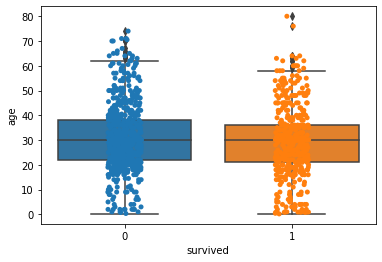

In [ ]:
ax = sns.boxplot(x='survived', y='age', data=dataset)
ax = sns.stripplot(x='survived', y='age', data=dataset)

### Separando conjuntos de dados para treinamento e teste

In [ ]:
array = dataset.values
x = array[:,0:6]
y = array[:,6]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.25, random_state=0, shuffle=True)

In [ ]:
# exibindo 5 primeiro registros para treinamento
x_train[:5]


array([[2.00000000e+00, 0.00000000e+00, 6.20000000e+01, 0.00000000e+00,
        0.00000000e+00, 1.05000000e+01],
       [3.00000000e+00, 1.00000000e+00, 8.00000000e+00, 3.00000000e+00,
        1.00000000e+00, 2.10750000e+04],
       [3.00000000e+00, 0.00000000e+00, 4.30000000e+01, 0.00000000e+00,
        0.00000000e+00, 8.05000000e+00],
       [3.00000000e+00, 1.00000000e+00, 3.00895126e+01, 0.00000000e+00,
        0.00000000e+00, 8.05000000e+00],
       [3.00000000e+00, 1.00000000e+00, 2.40000000e+01, 0.00000000e+00,
        0.00000000e+00, 7.75000000e+00]])

In [ ]:
# exibindo 5 primeiro resultados para treinamento
y_train[:5]

array([1., 0., 0., 0., 0.])

### Criando, treinando, avaliando o modelo e fazendo predições individuais

In [ ]:
# criando e treinando
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# fazendo predicoes com base nas caracteristicas escolhidas
model.predict([[1,1,20,0,2,160]])

array([1.])

In [ ]:
# fazendo predicoes com base nas caracteristicas escolhidas
model.predict([[0,0,62,1,1,70]])

array([1.])

In [ ]:
# obtendo predicoes para todo conjunto de dados
predictions_train = model.predict(x_train)
predictions_validation = model.predict(x_validation)

# avaliando resultado com dados de treinamento
print(skl.metrics.accuracy_score(y_train, predictions_train))

# avaliando resultado com dados de teste
print(skl.metrics.accuracy_score(y_validation, predictions_validation))

0.766546329723225
0.7292418772563177


## Dataset de teste com resultados (predito)

In [ ]:
pd.DataFrame(data=np.c_[np.c_[x_validation,y_validation],model.predict(x_validation)],
                  columns=['pclass','sex','age','sibsp','parch','fare','survived','predito']).tail()

,pclass,sex,age,sibsp,parch,fare,survived,predito
272,2.0,1.0,30.000000,3.0,0.0,21.0000,1.0,1.0
273,3.0,1.0,27.000000,0.0,0.0,7925.0000,1.0,0.0
274,1.0,0.0,24.000000,1.0,0.0,82.2667,1.0,0.0
275,3.0,1.0,30.089513,1.0,1.0,22.3583,1.0,1.0
276,1.0,0.0,39.000000,0.0,0.0,29.7000,0.0,0.0
